# Data & Things

## Lecture : IoT and Data

# Simulate sensor data & apply PCA

In this exercise, you will do the following:
1. Simulate sensor data
2. Apply PCA to simulated data
3. Simulate a new point
4. Find out which region the new point belongs to

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [50]:
# Step 1 Simulate synthetic predictive maintenance dataset
np.random.seed(42)
time_steps = 10000

sensors = {}
for i in range(1, 21):
    sensors[f'Sensor{i}'] = np.linspace(50, 100, time_steps) + np.random.normal(0, 20, time_steps)

# Combine into a DataFrame
data = pd.DataFrame(sensors)

print("Sample Data:")
display(data.head())

Sample Data:


,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,Sensor9,Sensor10,Sensor11,Sensor12,Sensor13,Sensor14,Sensor15,Sensor16,Sensor17,Sensor18,Sensor19,Sensor20
0,59.934283,36.430105,56.965725,10.388561,40.562849,51.964123,51.576755,56.403048,63.280022,69.217891,70.611892,66.017477,45.626995,72.350652,44.689254,77.397560,78.652455,13.535035,58.255621,69.225168
1,47.239714,43.895011,55.671472,28.905288,70.259050,48.722836,61.262950,72.314233,44.082680,42.605706,26.897905,49.021813,57.663772,55.924865,32.846243,47.839698,30.996639,43.242011,85.468972,78.684232
2,62.963772,38.062380,31.279604,38.269433,46.046264,69.045816,56.832040,19.905237,48.678273,38.418383,61.518745,41.079748,64.712840,57.699750,58.957432,28.348263,80.791904,50.558823,19.530576,49.933817
3,80.475599,52.223362,61.606686,53.008380,51.826387,80.671624,24.456718,84.807115,46.507354,68.681245,37.630232,53.375301,26.347709,25.898816,29.722450,77.854218,67.340775,65.921706,46.339473,54.707042
4,45.336935,73.963573,20.218348,70.503249,64.367814,63.756941,46.295596,56.621738,60.301076,-4.610793,43.471946,7.484493,52.034782,58.049158,72.706695,47.756466,31.983535,50.238633,47.968296,35.593104


In [51]:
# Step 2: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Display scaled data
print("Scaled Data Sample:")
display(pd.DataFrame(scaled_data, columns=data.columns).head())

Scaled Data Sample:


,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,Sensor9,Sensor10,Sensor11,Sensor12,Sensor13,Sensor14,Sensor15,Sensor16,Sensor17,Sensor18,Sensor19,Sensor20
0,-0.610580,-1.566006,-0.725010,-2.596654,-1.407431,-0.927666,-0.969437,-0.746813,-0.479506,-0.232249,-0.186682,-0.367113,-1.184181,-0.110562,-1.220616,0.099576,0.149868,-2.489953,-0.664518,-0.238621
1,-1.126525,-1.265030,-0.777771,-1.850742,-0.198347,-1.057996,-0.572396,-0.106939,-1.258090,-1.320570,-1.955170,-1.054209,-0.697301,-0.772550,-1.696973,-1.108663,-1.769317,-1.291246,0.441852,0.145353
2,-0.487452,-1.500195,-1.772111,-1.473524,-1.184173,-0.240819,-0.754021,-2.214587,-1.071707,-1.491814,-0.554553,-1.375289,-0.412171,-0.701019,-0.646714,-1.905416,0.236027,-0.996005,-2.238900,-1.021719
3,0.224281,-0.929241,-0.535820,-0.879792,-0.948835,0.226649,-2.081098,0.395468,-1.159753,-0.254195,-1.520984,-0.878208,-1.964016,-1.982653,-1.822619,0.118243,-0.305674,-0.376097,-1.148973,-0.827958
4,-1.203859,-0.052701,-2.223025,-0.175043,-0.438209,-0.453482,-1.185914,-0.738018,-0.600323,-3.251518,-1.284652,-2.733470,-0.924990,-0.686938,-0.093683,-1.112065,-1.729573,-1.008925,-1.082753,-1.603855


Do the following tasks:
1. Apply PCA with upto 5 components
2. Visualize how much variance of the dataset is defined by each component
3. Visualize the first 2 principal components and color them by timestep
4. Simulate a new position using code below
5. Plot the new point in the original 2D PCA graph

In [52]:
from IPython.display import display

pca_Sensors = PCA(n_components=3)
pca_Sensors.fit(scaled_data)

print('Means of variables: ')
display(pd.DataFrame(pca_Sensors.mean_))

print('Principal component loading vector:')
display(pd.DataFrame(pca_Sensors.components_))

print('Explained variaance of data by each component')
display(pd.DataFrame(pca_Sensors.explained_variance_ratio_))




Means of variables: 


,0
0,2.955858e-16
1,-1.818989e-16
2,-4.092726e-16
3,4.092726e-16
4,4.774847e-16
5,-1.136868e-16
6,-2.046363e-16
7,2.273737e-16
8,-1.818989e-16
9,-3.637979e-16


Principal component loading vector:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.220958,0.226328,0.224588,0.225708,0.221949,0.222314,0.221391,0.222676,0.222507,0.221161,0.224681,0.223260,0.226236,0.222072,0.227152,0.223642,0.226493,0.226655,0.221047,0.221118
1,0.464240,-0.007964,0.265555,-0.127266,-0.006144,-0.368805,-0.134053,-0.249055,0.216380,0.219967,-0.173892,-0.117472,-0.201297,0.329605,-0.140201,0.034342,-0.056043,-0.065998,0.345987,-0.212615
2,0.313502,-0.032346,-0.050695,-0.081669,-0.090497,-0.260033,-0.238680,-0.156949,-0.294692,0.193184,0.001865,0.526397,0.051853,-0.028149,-0.065510,-0.049195,0.110572,0.015065,-0.319039,0.456432


Explained variaance of data by each component


,0
0,0.376874
1,0.035917
2,0.035074


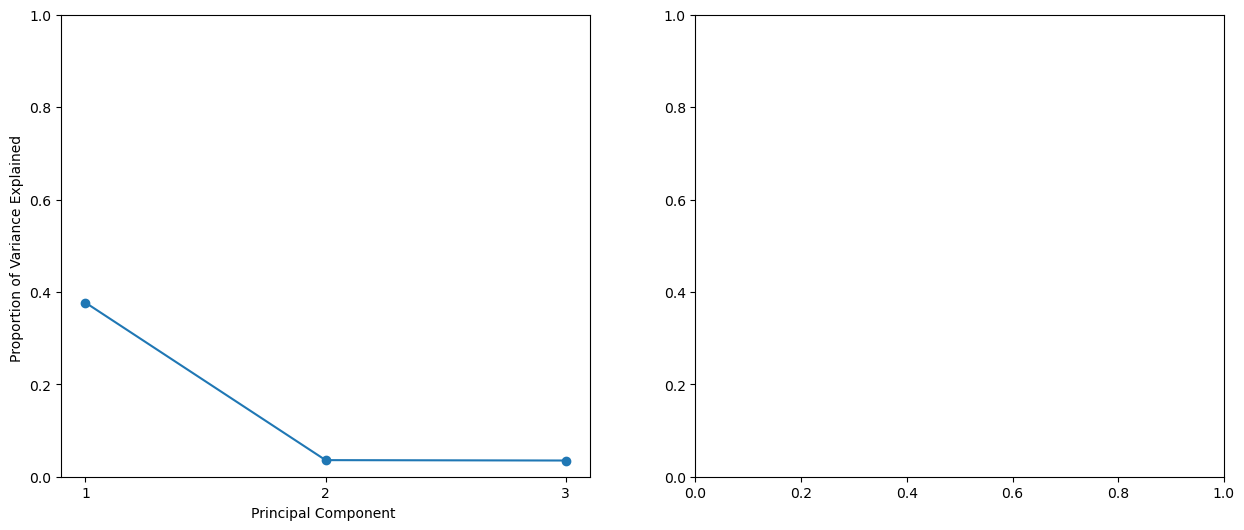

In [53]:

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
ticks = np.arange(pca_Sensors.n_components_) + 1
ax = axes[0]
ax.plot(ticks, pca_Sensors.explained_variance_ratio_, marker='o')
ax.set_xlabel('Principal Component '); 
ax.set_ylabel('Proportion of Variance Explained ') 
ax.set_ylim ([0 ,1]) 
ax.set_xticks(ticks)
plt.show()


,0,1,2
0,-3.697276,0.807661,0.827017
1,-4.330366,0.303912,-0.256562
2,-4.869362,-0.678489,0.499375
3,-3.728347,0.066625,0.505255
4,-5.039456,-0.849799,-2.145603


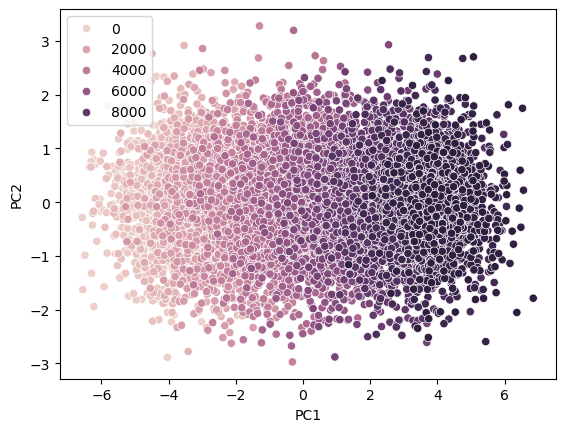

In [54]:
i, j = 0, 1, # which components 
scores = pca_Sensors.transform(scaled_data)
display(pd.DataFrame(scores).head())

plt.clf()

hue=np.arange(len(scores))

ax = sns.scatterplot(x=scores[:, i], y=scores[:, j], hue=hue)
ax.set_xlabel('PC%d' % (i+1)) 
ax.set_ylabel('PC%d' % (j+1)) 
plt.show()



In [55]:
# Step 4: Simulate a new observation and predict its position
new_observation = np.array([[75] * 20])
scaled_new_observation = scaler.transform(new_observation)
new_pca = pca_Sensors.transform(scaled_new_observation)

print("New observation PCA position:", new_pca)

New observation PCA position: [[-0.00353968  0.01164137 -0.00388459]]


/Users/marek/miniconda3/envs/python-for-data-analysis/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


5. Plot the new point in the original 2D PCA graph

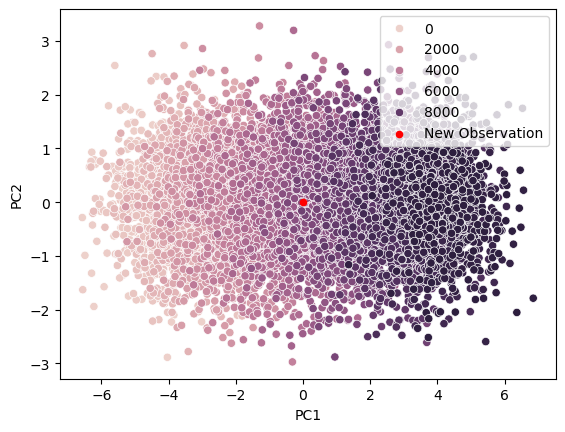

In [56]:
i, j = 0, 1, # which components

plt.clf()

hue=np.arange((len(scores)))

ax = sns.scatterplot(x=scores[:, i], y=scores[:, j], hue=hue)
ax.scatter(new_pca[0, i], new_pca[0, j], color='red', s=20, label='New Observation')
ax.legend()
ax.set_xlabel('PC%d' % (i+1)) 
ax.set_ylabel('PC%d' % (j+1)) 
plt.show()